In [1]:
# 載入要使用的函式庫
import pandas as pd
import Ridetrack_Eric_v1
SensorFusion = Ridetrack_Eric_v1.SensorFusion()
AutoTag = Ridetrack_Eric_v1.AutoTag()
DrivePSTs = Ridetrack_Eric_v1.DrivePSTs()
else_ = Ridetrack_Eric_v1.else_()

In [5]:
SensorFusion.Axis_Process('20240611_data/20240611_eric_2.xls', '20240611_data/20240611_eric_2_sliding_window.csv', app_time_error=4, window_size_sec=4)

Calculating the Euler angles: 100%|██████████| 29149/29149 [03:56<00:00, 123.15it/s]


Execution time: 0.0 hours 3.0 minutes 58.60277056694031 seconds


,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,Pitch (deg),Roll (deg),Yaw (deg),Absolute Time
0,-0.349140,-0.163917,0.035287,1.352724,1.977012,6.815694,-0.313059,-0.666809,0.067393,2024-06-11 15:12:01.479622+08:00
1,0.305997,0.053396,0.016112,-3.842694,3.217209,12.269685,-0.210728,-0.082560,0.096976,2024-06-11 15:12:01.499676+08:00
2,-0.229831,0.065114,-0.044608,2.592921,-3.936666,9.200318,-0.086492,-0.521190,0.011602,2024-06-11 15:12:01.533009+08:00
3,0.063117,0.211055,-0.073370,-0.486023,-3.069965,12.873024,0.315303,-0.400440,-0.132184,2024-06-11 15:12:01.566343+08:00
4,-0.242614,-0.175635,0.036352,2.056619,3.317765,6.102221,-0.019643,-0.863410,-0.060415,2024-06-11 15:12:01.599676+08:00
...,...,...,...,...,...,...,...,...,...,...
29144,0.229032,0.056326,-0.018908,-0.658405,-1.384447,11.872248,-5.342208,17.230776,1.305211,2024-06-11 15:28:12.932999+08:00
29145,0.132093,-0.052331,0.032224,-0.921768,5.333683,9.387066,-5.377834,17.921569,1.243866,2024-06-11 15:28:12.966333+08:00
29146,0.027697,0.145808,-0.058323,-0.466869,-4.717176,11.455657,-4.953941,17.395048,1.259023,2024-06-11 15:28:12.999666+08:00
29147,0.164051,0.012650,0.001332,-1.424550,1.431134,11.465234,-4.712083,17.632505,1.205182,2024-06-11 15:28:13.032999+08:00


### IMU Raw Data做可視化與動作統計

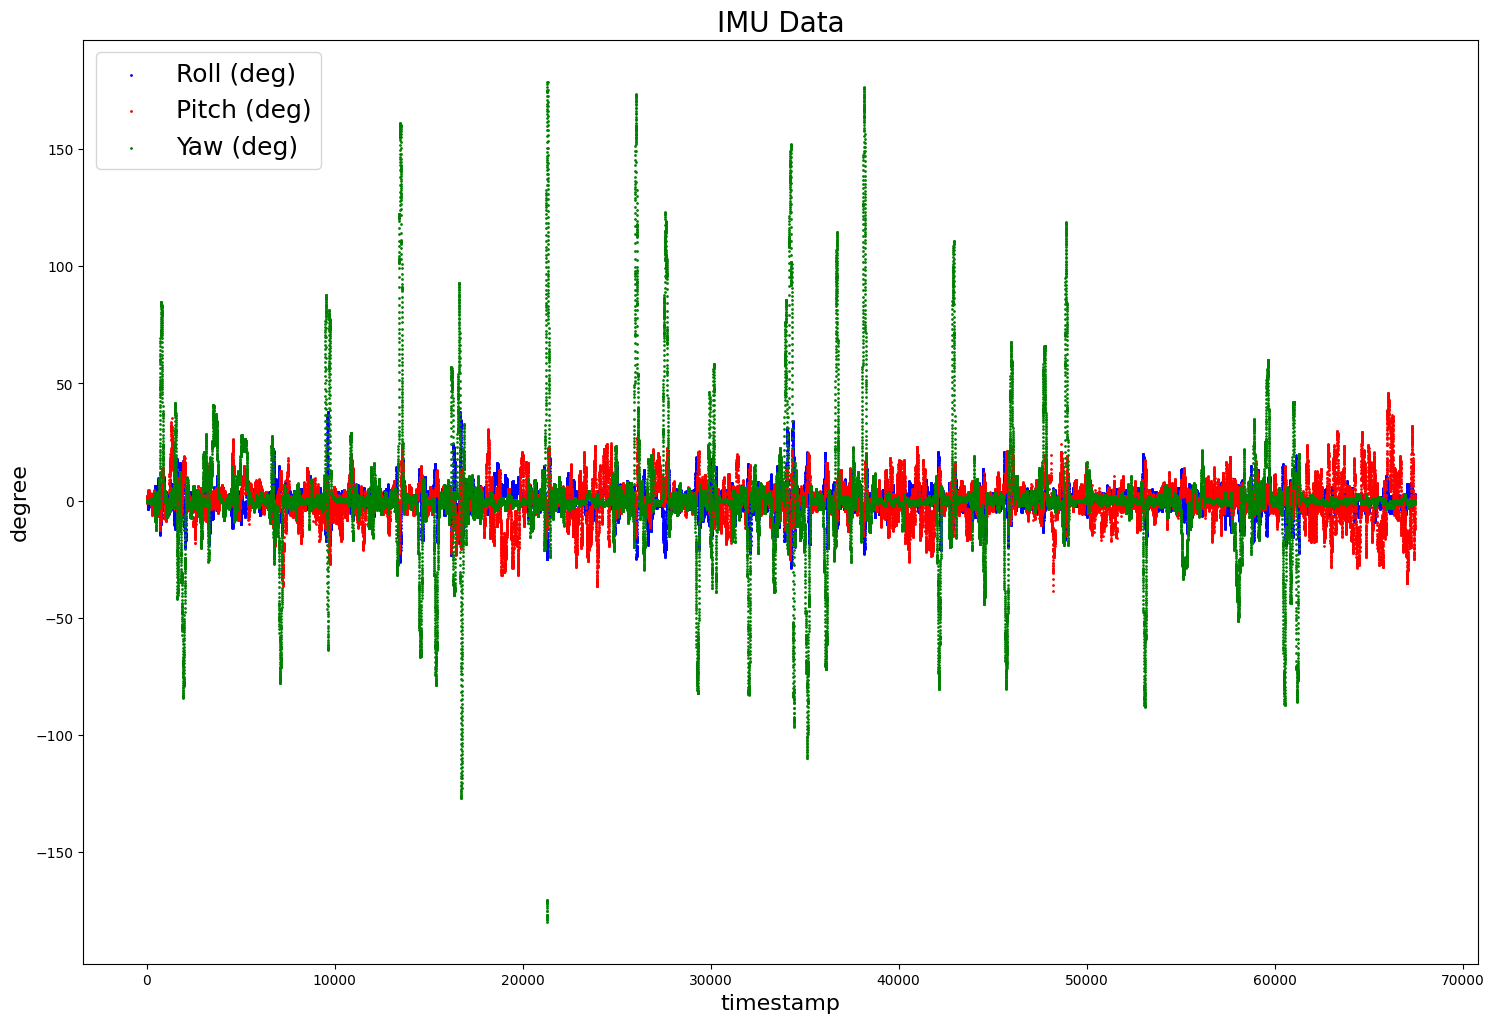

In [4]:
# 原始IMU資料
import matplotlib.pyplot as plt
import pandas as pd

# Load the provided CSV file
file_path = './20240708_data/20240708_Liyi_sliding_window.csv'
data = pd.read_csv(file_path)
# data = data[0:int(len(data)/1.8)]

# 生成示例數據
IMU_feature = ['X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration', 'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'Z-axis Angular Velocity']
X = range(len(data))
Y1 = data[IMU_feature[3]]
Y2 = data[IMU_feature[4]]
Y3 = data[IMU_feature[5]]

# 繪製點圖
plt.figure(figsize=(18, 12))
plt.scatter(X, Y1, color='blue', s=1, label='Roll (deg)')
plt.scatter(X, Y2, color='red', s=1, label='Pitch (deg)')
plt.scatter(X, Y3, color='green', s=1, label='Yaw (deg)')

# 自定義圖表
plt.title("IMU Data", fontsize=20)
plt.xlabel("timestamp", fontsize=16)
plt.ylabel("degree", fontsize=16)
# plt.ylim(-15, 15)
# plt.xlim(left=1300)
plt.legend(prop={'size': 18}, loc='upper left')

# 顯示圖表
plt.show()

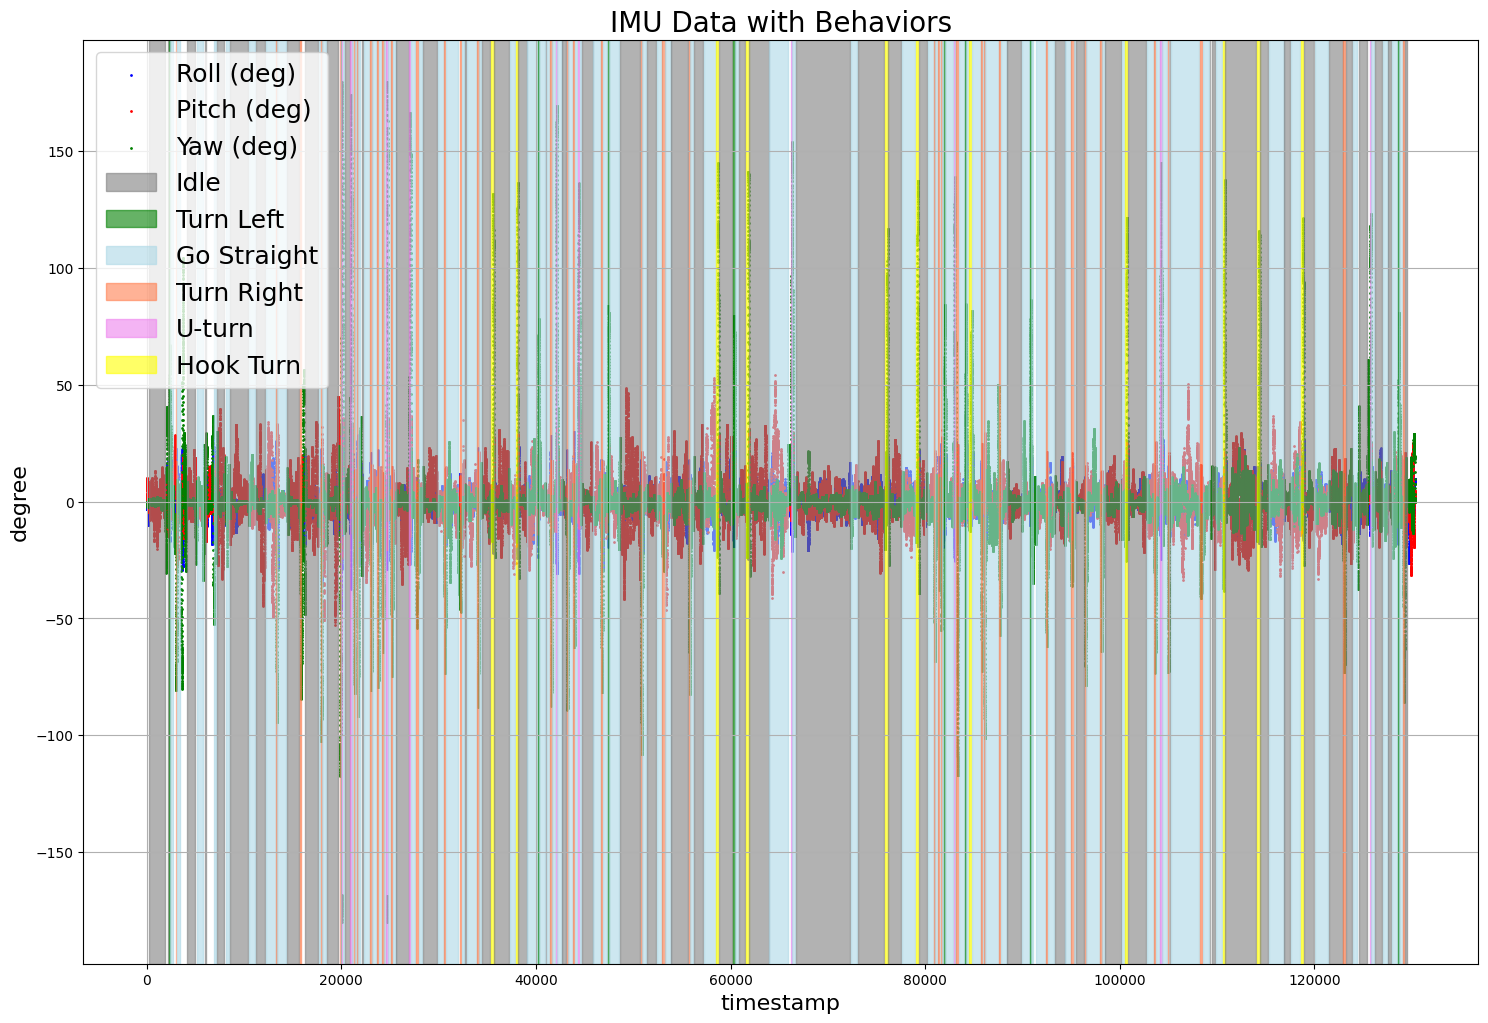

In [2]:
# 加上動作標籤背景區塊
import matplotlib.pyplot as plt
import pandas as pd

# Load the provided CSV file
file_path = './20240709_data/20240709_family_sliding_window.csv'
data = pd.read_csv(file_path)

# Extract relevant columns
IMU_feature = [
    'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
    'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)',
    'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'Z-axis Angular Velocity'
]
X = range(len(data))
Y1 = data[IMU_feature[3]]
Y2 = data[IMU_feature[4]]
Y3 = data[IMU_feature[5]]

# Plot scatter plot
plt.figure(figsize=(18, 12))
plt.scatter(X, Y1, color='blue', s=1, label='Roll (deg)')
plt.scatter(X, Y2, color='red', s=1, label='Pitch (deg)')
plt.scatter(X, Y3, color='green', s=1, label='Yaw (deg)')

# Add action labels with colored background
colors = {
    'Go Straight': 'lightblue',
    'Idle': 'grey',
    'Turn Left': 'green',
    'Turn Right': 'coral',
    'Hook Turn': 'yellow',
    'U-turn': 'violet'
}

actions = ['Go Straight', 'Idle', 'Turn Left', 'Turn Right', 'Hook Turn', 'U-turn']
added_labels = set()

prev_action = None
for i in range(len(data)):
    current_action = data.loc[i, 'Action']
    if current_action != prev_action:
        if prev_action in actions:
            if prev_action not in added_labels:
                plt.axvspan(start, i, color=colors[prev_action], alpha=0.6, label=f'{prev_action}')
                added_labels.add(prev_action)
            else:
                plt.axvspan(start, i, color=colors[prev_action], alpha=0.6)
        start = i
    prev_action = current_action

# Customize the plot
plt.title("IMU Data with Behaviors", fontsize=20)
plt.xlabel("timestamp", fontsize=16)
plt.ylabel("degree", fontsize=16)
plt.grid(True)
plt.legend(prop={'size': 18}, loc='upper left')
plt.show()

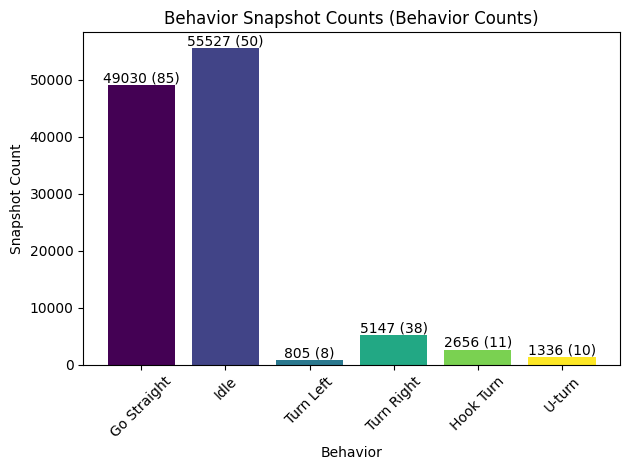

In [3]:
# 繪製動作數量與snapshot數量
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀取CSV文件
df = pd.read_csv('./20240709_data/20240709_family_sliding_window.csv', skip_blank_lines=False)

# 初始化變數
last_action = None
action_counts = {}
total_counts = {}

# 遍歷每一行
for action in df['Action']:
    if str(action) != 'nan':
        # 更新總行數
        if action not in total_counts:
            total_counts[action] = 0
        total_counts[action] += 1

        # 更新區域次數
        if action != last_action:
            if action not in action_counts:
                action_counts[action] = 0
            action_counts[action] += 1
    last_action = action

# 確定特定順序
desired_order = ['Go Straight', 'Idle', 'Turn Left', 'Turn Right', 'Hook Turn', 'U-turn']
actions = [action for action in desired_order if action in action_counts]
counts = [action_counts[action] for action in actions]
total_counts_list = [total_counts[action] for action in actions]

# 繪製總行數長條圖
colors = plt.cm.viridis(np.linspace(0, 1, len(actions)))

plt.bar(actions, total_counts_list, color=colors)
plt.xlabel('Behavior')
plt.ylabel('Snapshot Count')
plt.title('Behavior Snapshot Counts (Behavior Counts)')
plt.xticks(rotation=45)  # 旋轉文字45度

# 顯示每個長條的總行數和區域次數
for i, (total, count) in enumerate(zip(total_counts_list, counts)):
    plt.text(i, total, f'{total} ({count})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

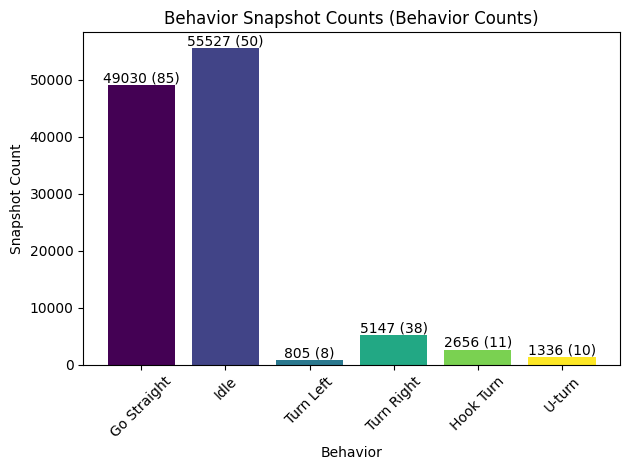

In [4]:
else_.Calculate_behavior_count('./20240709_data/20240709_family_sliding_window.csv')

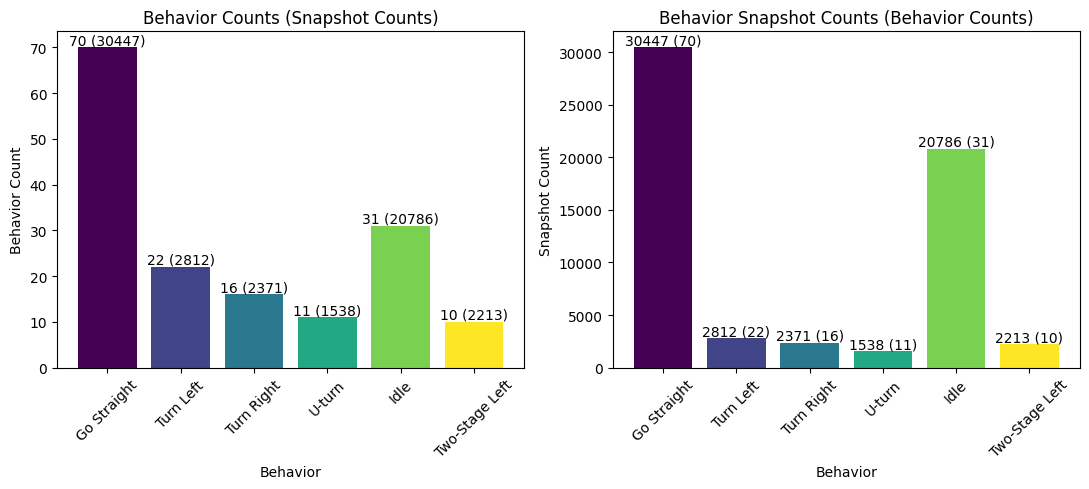

In [1]:
# 繪製動作數量與snapshot數量
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀取CSV文件
df = pd.read_csv('./20240708_data/20240708_alan_sliding_window.csv', skip_blank_lines=False)

# 初始化變數
last_action = None
action_counts = {}
total_counts = {}

# 遍歷每一行
for action in df['Action']:
    if str(action) != 'nan':
        # 更新總行數
        if action not in total_counts:
            total_counts[action] = 0
        total_counts[action] += 1

        # 更新區域次數
        if action != last_action:
            if action not in action_counts:
                action_counts[action] = 0
            action_counts[action] += 1
    last_action = action

# 設置子圖
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# 繪製區域次數長條圖
actions = list(action_counts.keys())
counts = list(action_counts.values())
total_counts_list = [total_counts[action] for action in actions]
colors = plt.cm.viridis(np.linspace(0, 1, len(actions)))

axs[0].bar(actions, counts, color=colors)
axs[0].set_xlabel('Behavior')
axs[0].set_ylabel('Behavior Count')
axs[0].set_title('Behavior Counts (Snapshot Counts)')
axs[0].tick_params(axis='x', rotation=45)  # 旋轉文字45度

# 顯示每個長條的區域次數和總行數
for i, (count, total) in enumerate(zip(counts, total_counts_list)):
    axs[0].text(i, count, f'{count} ({total})', ha='center', va='bottom')

# 繪製總行數長條圖
axs[1].bar(actions, total_counts_list, color=colors)
axs[1].set_xlabel('Behavior')
axs[1].set_ylabel('Snapshot Count')
axs[1].set_title('Behavior Snapshot Counts (Behavior Counts)')
axs[1].tick_params(axis='x', rotation=45)  # 旋轉文字45度

# 顯示每個長條的總行數和區域次數
for i, (total, count) in enumerate(zip(total_counts_list, counts)):
    axs[1].text(i, total, f'{total} ({count})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 繪製Kalman Filter後的IMU Data

In [11]:
# # 處理IMU的RawData，轉成可以使用的.csv檔案
# SensorFusion.Axis_Process('20240528_stand_test.xls', '20240528_stand_test.csv')

# #校正歸零角度
# df = pd.read_csv('20240528_stand_test.csv')
# SensorFusion.calibrate_angles(df, '20240528_stand_test.csv')

# #校正歸角速度  (K依每次開始前機車靜置校正不同有所改變)
# df = pd.read_csv('20240528_stand_test.csv')
# SensorFusion.calibrate_imu(df, 50, '20240528_stand_test.csv')

# # 正規化
# df = pd.read_csv('20240528_stand_test.csv')

feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']


# SensorFusion.normalize_data(df, feature, method="minmax", save_path='20240528_stand_test.csv')

# 卡爾曼濾波器(https://pypi.org/project/filterpy/)
df = pd.read_csv('20240528_stand_test.csv')
SensorFusion.apply_kalman_filter(df, feature,  q_noise=0.0001, r_noise=0.001, save_path='20240528_stand_test.csv')

  0%|          | 0/658 [00:00<?, ?it/s]

100%|██████████| 658/658 [00:00<00:00, 8155.74it/s]

Execution time: 0.0 hours 0.0 minutes 0.0936732292175293 seconds


,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle,Absolute Time
0,-0.003714,0.019179,0.006817,-0.027936,6.090897,7.721586,-0.007093,0.036630,0.013020,2024-05-28 09:16:35.506784+08:00
1,0.000588,0.013085,0.005057,-0.058573,6.097075,7.699765,-0.002594,0.044189,0.016483,2024-05-28 09:16:35.538786+08:00
2,0.003325,0.008877,0.001620,-0.060224,6.114083,7.673281,0.004637,0.048392,0.014838,2024-05-28 09:16:35.570784+08:00
3,0.004820,0.007263,-0.001174,-0.079024,6.135774,7.598567,0.013345,0.053038,0.009650,2024-05-28 09:16:35.602784+08:00
4,0.005408,0.006339,-0.001877,-0.097424,6.154047,7.547054,0.022595,0.058286,0.004436,2024-05-28 09:16:35.634784+08:00
...,...,...,...,...,...,...,...,...,...,...
653,0.007006,0.002780,-0.000413,-0.221704,6.397984,7.388661,6.205785,-2.018946,-0.867367,2024-05-28 09:16:56.402784+08:00
654,0.006386,0.003250,-0.000396,-0.229639,6.404567,7.359225,6.217982,-2.012738,-0.868124,2024-05-28 09:16:56.434784+08:00
655,0.003129,0.004306,-0.000308,-0.232884,6.409177,7.340001,6.223957,-2.004515,-0.868712,2024-05-28 09:16:56.466784+08:00
656,0.012445,0.001530,0.000200,-0.231998,6.429053,7.304206,6.247725,-2.001593,-0.868330,2024-05-28 09:16:56.498784+08:00


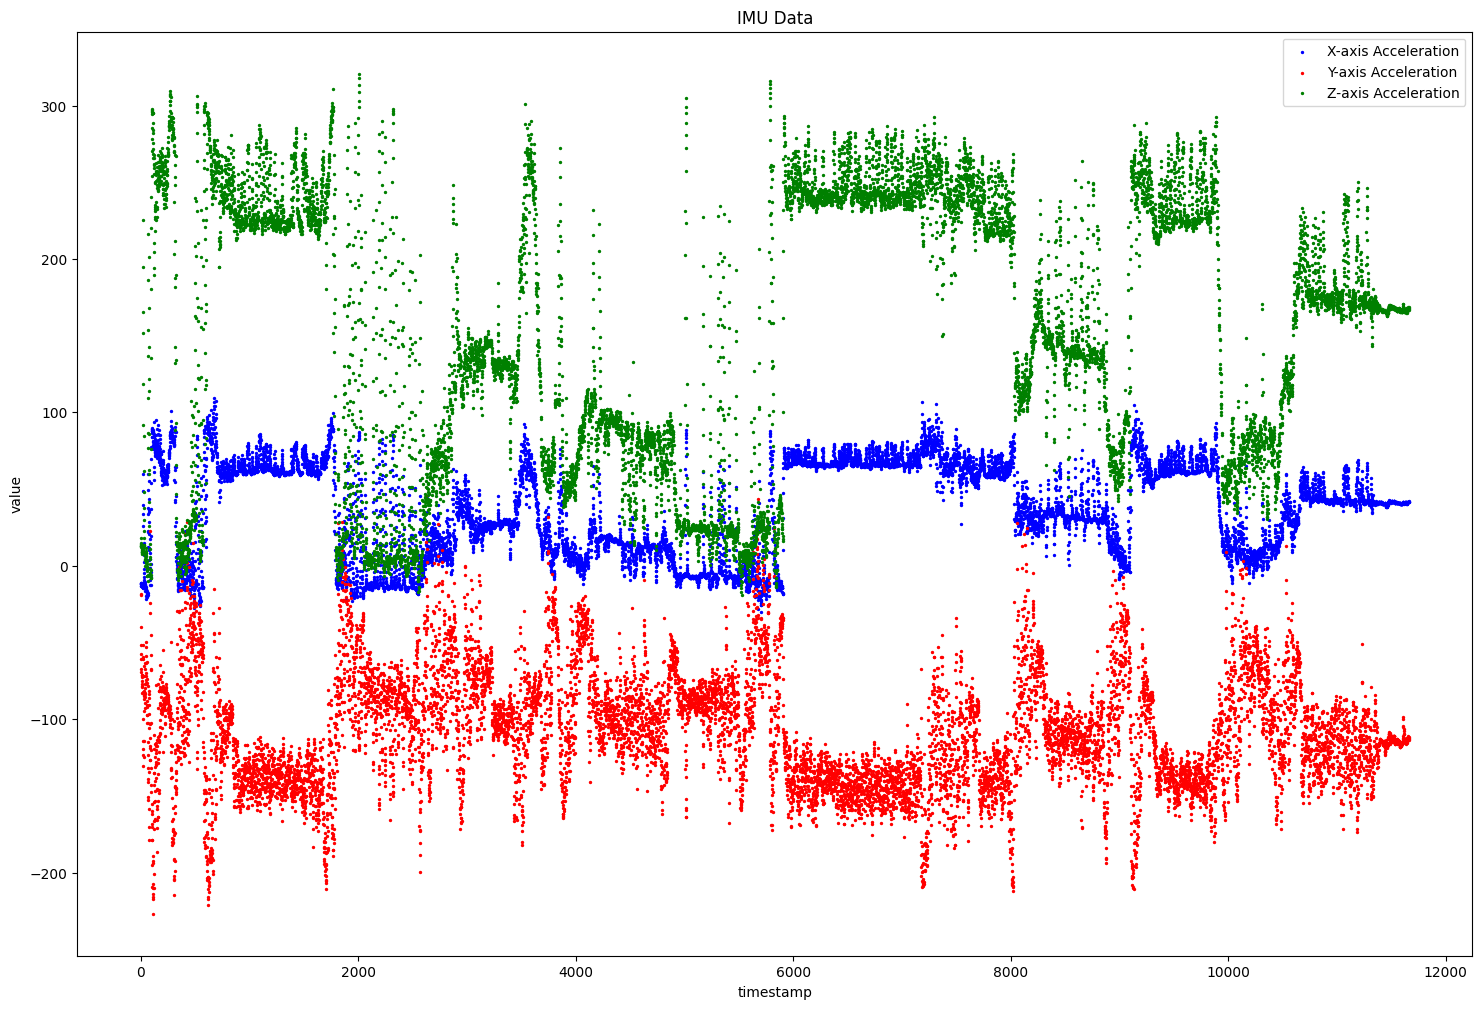

In [3]:
# 處理後的IMU資料
import matplotlib.pyplot as plt
import pandas as pd

# Load the provided CSV file
file_path = '20240125_eric_merged.csv'
data = pd.read_csv(file_path)
data = data[0:int(len(data)/2)]

# 生成示例數據
IMU_feature = ['X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'Z-axis Angular Velocity']
X = range(len(data))
Y1 = data[IMU_feature[3]]
Y2 = data[IMU_feature[4]]
Y3 = data[IMU_feature[5]]

# 繪製點圖
plt.figure(figsize=(18, 12))
plt.scatter(X, Y1, color='blue', s=2, label='X-axis Acceleration')
plt.scatter(X, Y2, color='red', s=2, label='Y-axis Acceleration')
plt.scatter(X, Y3, color='green', s=2, label='Z-axis Acceleration')

# 自定義圖表
plt.title("IMU Data")
plt.xlabel("timestamp")
plt.ylabel("value")
# plt.ylim(-7.5, 5)
plt.legend()

# 顯示圖表
plt.show()